In [4]:
import os
from io import StringIO 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy import signal

In [5]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\2021_HWU\\Exp data-2021'
folder = '20230303_0_5%_Pr_YVO4_tel_WL'
file_name=['86_OD.csv','100_OD.csv','110_OD.csv','131_OD.csv']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


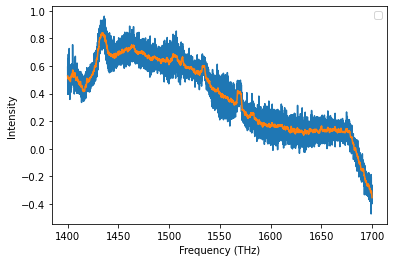

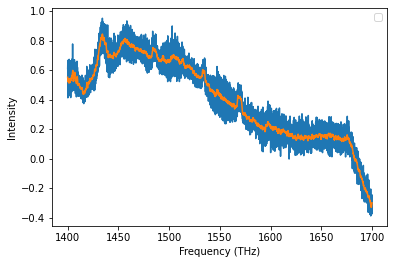

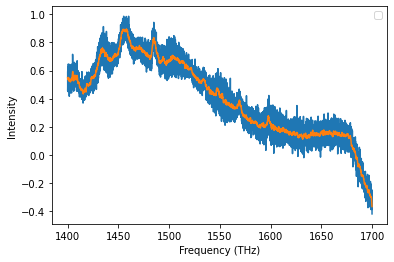

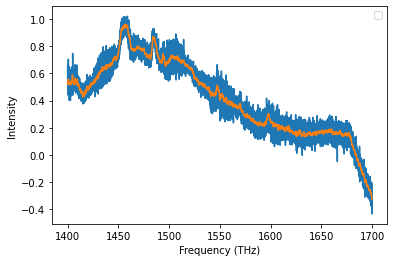

In [19]:
data=[]
data=pd.DataFrame(data)
data_smooth=[]
data_smooth=pd.DataFrame(data_smooth)
for index,file in enumerate(file_name):
    path=dir + '\\' + folder + '\\' + file

    file_data = open(path, 'r')
    content = file_data.read()
    # change new line character from '\r\n' to '\n'
    lines = content.replace('\r', '').split('\n')
    # Remove the first and last 2 lines of the file
    # StringIO can be considered as a file stored in memory
    read_data=pd.read_csv(StringIO("\n".join(lines[99:-3])), header=None, sep=';')
    #read_data=read_data.to_numpy() # Read the raw data when the laser is focused into the sample

    data[index*2]=read_data[0]
    data[index*2+1]=read_data[1]

    data_smooth[index*2]=read_data[0]
    data_smooth[index*2+1]=signal.savgol_filter(read_data[1],80,4, mode="nearest")

    fig,ax=plt.subplots()
    ax.plot(read_data[0],read_data[1])
    ax.plot(read_data[0],data_smooth[index*2+1])
    ax.legend()
    #ax.set_xlim(186,200)
    ax.set_xlabel('Frequency (THz)')
    ax.set_ylabel('Intensity')

data.to_csv (r'C:\\Users\\wj2002\\Desktop\\data.csv', index = None, header=False) 
data_smooth.to_csv (r'C:\\Users\\wj2002\\Desktop\\data_smooth.csv', index = None, header=False) 